In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

dataset = pd.read_csv('streamlit/dataset/new_acre_valve.csv')

dataset.head()


,id,region,building_type,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,mix_manufacturers,value_mill,general_contractor
0,202100847180,Central States,hospital,186652.0,14,0,5,0,19,True,25.2,Harvey Clearly Builders
1,201900664272,Central States,school,28760.0,23,0,0,26,49,True,38.0,Pogue Construction
2,202300402748,Central States,school,122296.0,27,0,11,7,45,False,20.0,Noble Texas Builders
3,202300441418,Central States,school,8695.0,6,0,0,1,7,True,3.0,NaN
4,202300082736,Central States,housing,3292.0,0,6,0,0,6,False,5.2,Cheyenne Construction Group


In [2]:
# include column with est irrigation market

def calculate_new_col(col):
    return col['spray_count']*252.1 + col['mp_count']*364.2 + col['drip_count']*475 + col['rotor_count']*188.8 

# Apply function to create new column
dataset['est_irrig_value'] = dataset.apply(calculate_new_col, axis=1)

dataset.head()


,id,region,building_type,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,mix_manufacturers,value_mill,general_contractor,est_irrig_value
0,202100847180,Central States,hospital,186652.0,14,0,5,0,19,True,25.2,Harvey Clearly Builders,5904.4
1,201900664272,Central States,school,28760.0,23,0,0,26,49,True,38.0,Pogue Construction,10707.1
2,202300402748,Central States,school,122296.0,27,0,11,7,45,False,20.0,Noble Texas Builders,13353.3
3,202300441418,Central States,school,8695.0,6,0,0,1,7,True,3.0,NaN,1701.4
4,202300082736,Central States,housing,3292.0,0,6,0,0,6,False,5.2,Cheyenne Construction Group,2185.2


In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

numeric_features = ['square_feet', 'spray_count', 'mp_count', 'drip_count', 'rotor_count', 'valve_count', 'value_mill', 'est_irrig_value']
categorical_features = ['region', 'building_type', 'mix_manufacturers', 'general_contractor']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

processed_data = preprocessor.fit_transform(dataset)

encoded_categorical_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

all_feature_names = np.hstack([numeric_features, encoded_categorical_names])

processed_df = pd.DataFrame(processed_data, columns=all_feature_names)

processed_df.head()


,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,value_mill,est_irrig_value,region_Central States,region_Florida,...,general_contractor_Tonn & Blank,general_contractor_Tovey Shultz,general_contractor_Triton Construction,general_contractor_Urban Habitat,general_contractor_Vantage Construction Services,general_contractor_W.T Rich Company,general_contractor_Walsh Construction Co.,general_contractor_Wasatch West Construction,general_contractor_Workman Commercial,general_contractor_Xylem Water Solutions
0,0.524297,0.721480,-0.358781,0.460254,-0.427632,-0.082291,0.461218,-0.041978,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.287280,1.667110,-0.358781,-0.535487,1.883361,1.439527,0.986293,0.731566,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.193502,2.087390,-0.358781,1.655143,0.194558,1.236618,0.247906,1.157774,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.390416,-0.119079,-0.358781,-0.535487,-0.338748,-0.691018,-0.449459,-0.718931,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.418188,-0.749499,0.000666,-0.535487,-0.427632,-0.741745,-0.359211,-0.641008,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np


In [5]:
latent_dim = 20  

# Encoder
input_data = tf.keras.Input(shape=(processed_df.shape[1],))
encoded = layers.Dense(256, activation='relu')(input_data) 
encoded = layers.Dense(128, activation='relu')(encoded)   
encoded = layers.Dense(64, activation='relu')(encoded)     
encoded = layers.Dense(32, activation='relu')(encoded)
z_mean = layers.Dense(latent_dim, name='z_mean')(encoded)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(encoded)


def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# Encoder model
encoder = Model(input_data, [z_mean, z_log_var, z], name='encoder')
encoder.summary()


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 118)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     30,464 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      2,080 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 20)        │        660 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 20)        │        660 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z (Lambda)          │ (None, 20)        │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 75,016 (293.03 KB)

 Trainable params: 75,016 (293.03 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Decoder
latent_inputs = tf.keras.Input(shape=(latent_dim,), name='z_sampling')
decoded = layers.Dense(64, activation='relu')(latent_inputs)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(256, activation='relu')(decoded)    # Added new layer
output_data = layers.Dense(processed_df.shape[1], activation='sigmoid')(decoded)


# Decoder model
decoder = Model(latent_inputs, output_data, name='decoder')
decoder.summary()


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ z_sampling (InputLayer)         │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 118)            │        30,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,014 (285.21 KB)

 Trainable params: 73,014 (285.21 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
output = decoder(encoder(input_data)[2])

vae = Model(input_data, output, name='vae')


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, Model

class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.reconstruction_loss_fn = tf.keras.losses.MeanSquaredError()

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)

        reconstruction_loss = tf.reduce_mean(self.reconstruction_loss_fn(inputs, reconstructed) * inputs.shape[1])

        kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        kl_loss = tf.reduce_sum(kl_loss, axis=-1)
        kl_loss *= -0.5

        self.add_loss(reconstruction_loss + kl_loss)

        return reconstructed

vae = VAE(encoder, decoder)
vae.compile(optimizer='adam')


In [9]:
x_train = processed_df.values

vae.fit(x_train, x_train, epochs=400, batch_size=200)


Epoch 1/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3396.7185
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3296.4858
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3212.5171
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3114.5291
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3011.8572
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2908.1484
Epoch 7/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2796.9905
Epoch 8/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2668.0972
Epoch 9/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2541.2854
Epoch 10/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2411.7722
Epoch 11/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2194.4258
Epoch 12/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2060.4734
Epoch 13/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1867.4839
Epoch 14/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1698.1317
Epoch 15/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms

In [10]:
# Generate new synthetic data
z_sample = np.random.normal(size=(10, latent_dim))
generated_data = decoder.predict(z_sample)

# Convert the generated data back to a DataFrame
generated_df = pd.DataFrame(generated_data, columns=all_feature_names)

# Display the generated data
generated_df.head()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,value_mill,est_irrig_value,region_Central States,region_Florida,...,general_contractor_Tonn & Blank,general_contractor_Tovey Shultz,general_contractor_Triton Construction,general_contractor_Urban Habitat,general_contractor_Vantage Construction Services,general_contractor_W.T Rich Company,general_contractor_Walsh Construction Co.,general_contractor_Wasatch West Construction,general_contractor_Workman Commercial,general_contractor_Xylem Water Solutions
0,0.002333,0.001853,0.001480,0.003542,0.000581,0.001430,0.001057,0.002072,0.116789,0.109100,...,0.003852,0.004220,0.013536,0.011389,0.004482,0.006453,0.003453,0.004436,0.010944,0.014053
1,0.000125,0.000123,0.000054,0.000158,0.000017,0.000062,0.000024,0.000076,0.063245,0.059522,...,0.000314,0.000181,0.001106,0.001064,0.000255,0.000386,0.000292,0.000701,0.001129,0.001066
2,0.000746,0.001739,0.000797,0.001771,0.000275,0.000597,0.000337,0.000675,0.099180,0.109651,...,0.001970,0.001252,0.005960,0.003581,0.002088,0.002681,0.001961,0.003199,0.005804,0.006356
3,0.000313,0.000303,0.000147,0.000497,0.000057,0.000151,0.000074,0.000219,0.069493,0.056433,...,0.000554,0.000469,0.001912,0.001533,0.000701,0.000704,0.000527,0.001792,0.001614,0.001482
4,0.000611,0.001126,0.000575,0.001197,0.000198,0.000531,0.000304,0.000501,0.112309,0.115666,...,0.001946,0.001728,0.007769,0.003518,0.002394,0.002657,0.001753,0.002989,0.005243,0.007147


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step


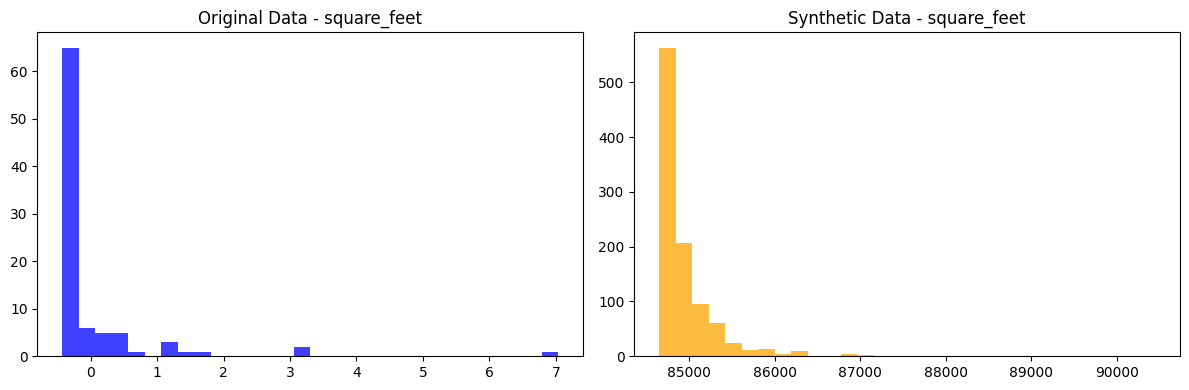

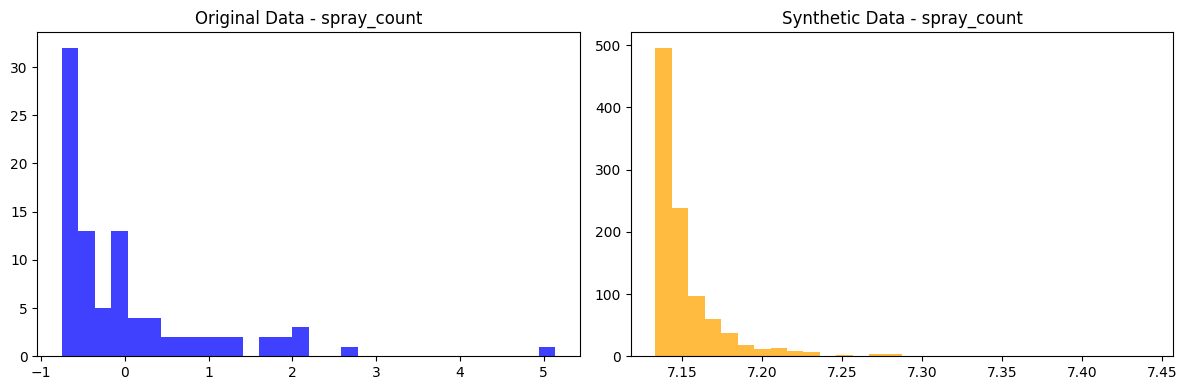

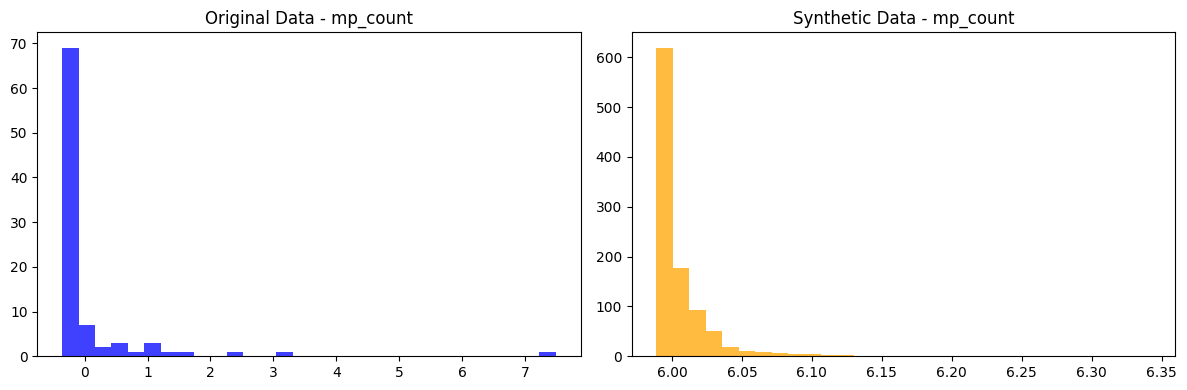

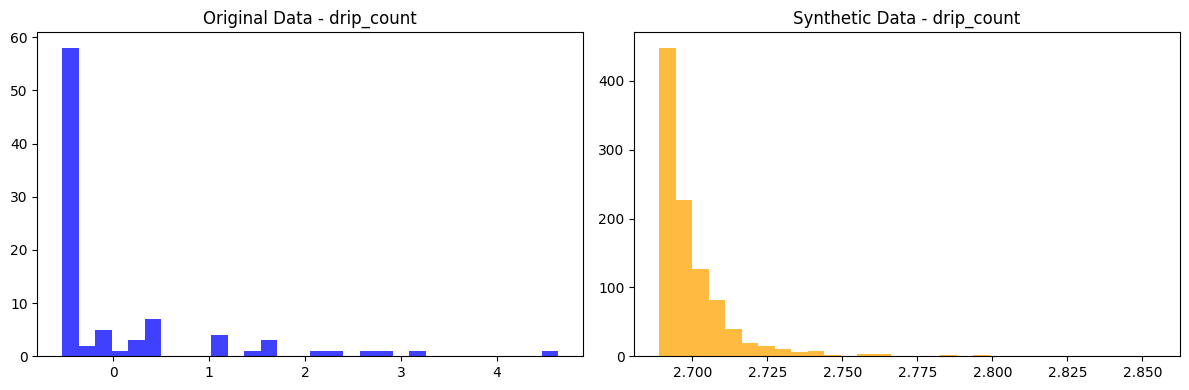

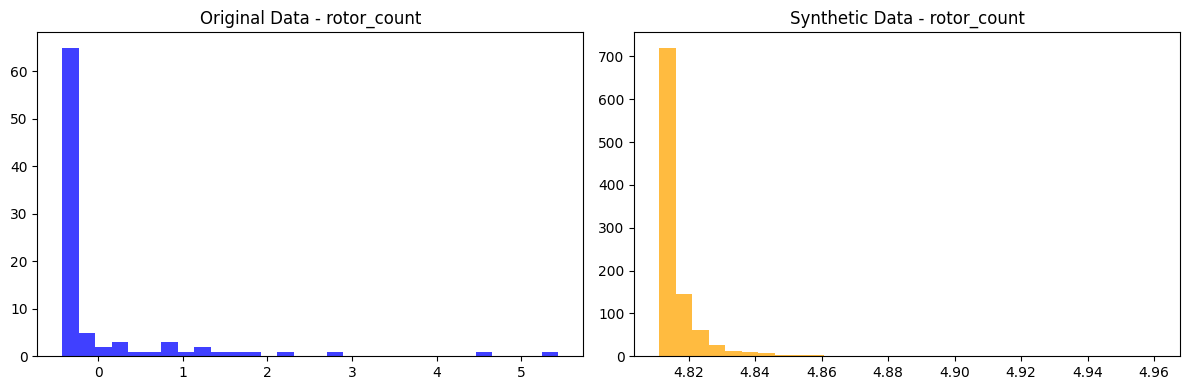

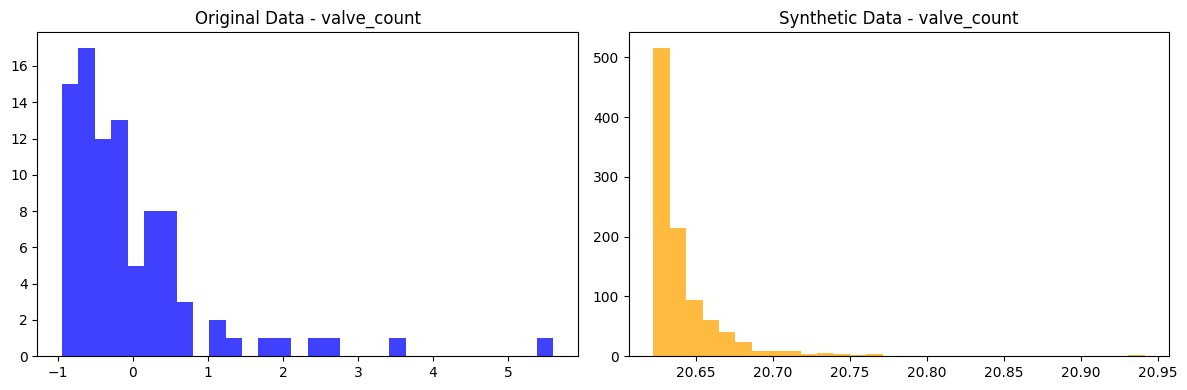

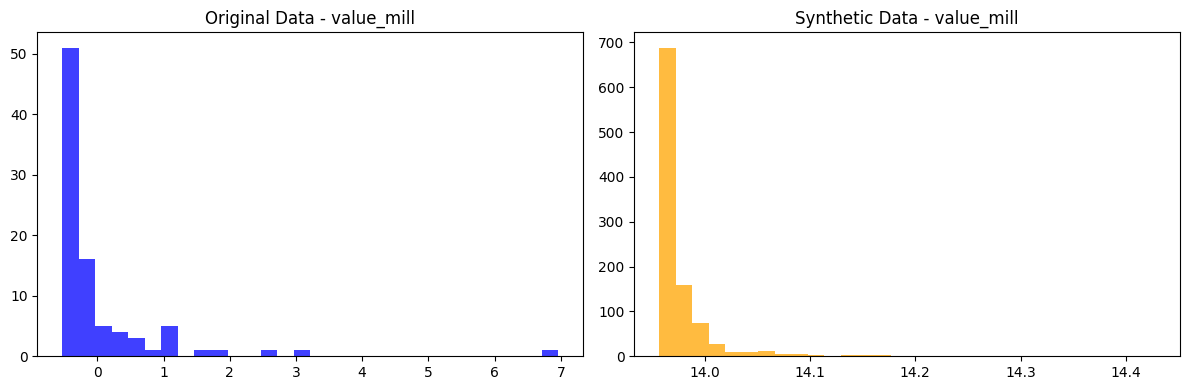

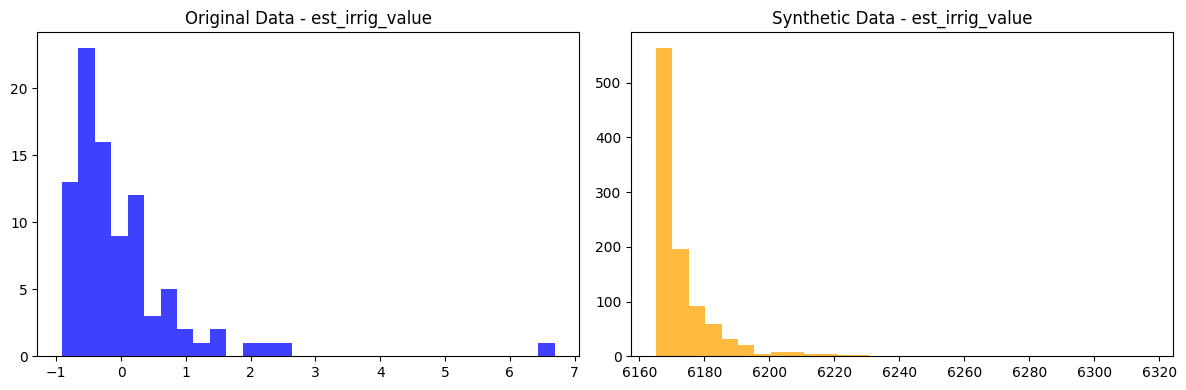

In [11]:
import matplotlib.pyplot as plt

n_synthetic_samples = 1000  

scaler = preprocessor.named_transformers_['num']['scaler']

z_samples = np.random.normal(size=(n_synthetic_samples, latent_dim))
generated_data = decoder.predict(z_samples)

generated_df = pd.DataFrame(generated_data, columns=all_feature_names)

generated_df[numeric_features] = scaler.inverse_transform(generated_df[numeric_features])

for column in numeric_features:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(processed_df[column], bins=30, alpha=0.75, label='Original Data', color='blue')
    plt.title(f'Original Data - {column}')
    plt.subplot(1, 2, 2)
    plt.hist(generated_df[column], bins=30, alpha=0.75, label='Synthetic Data', color='orange')
    plt.title(f'Synthetic Data - {column}')
    plt.tight_layout()
    plt.show()



In [12]:
categorical_transformer = preprocessor.named_transformers_['cat']['onehot']
encoded_categorical_names = categorical_transformer.get_feature_names_out(categorical_features)

generated_numeric_df = generated_df[numeric_features]
generated_categorical_df = generated_df[encoded_categorical_names]

inverse_transformed_categorical = categorical_transformer.inverse_transform(generated_categorical_df)

inverse_categorical_df = pd.DataFrame(inverse_transformed_categorical, columns=categorical_features)

final_synthetic_df = pd.concat([generated_numeric_df, inverse_categorical_df], axis=1)




In [13]:
num_df = final_synthetic_df[numeric_features]  
num_df.head()

,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,value_mill,est_irrig_value
0,84676.484375,7.134940,5.989849,2.690469,4.811314,20.623043,13.957340,6165.352539
1,85034.203125,7.170580,6.009741,2.702196,4.816515,20.639473,13.980939,6174.114746
2,84659.171875,7.135207,5.989197,2.689352,4.811156,20.622568,13.957070,6165.135254
3,84732.117188,7.141147,5.994793,2.693328,4.812154,20.629829,13.962494,6168.004395
4,85033.718750,7.171908,6.016933,2.706335,4.817512,20.658096,13.987296,6180.857422


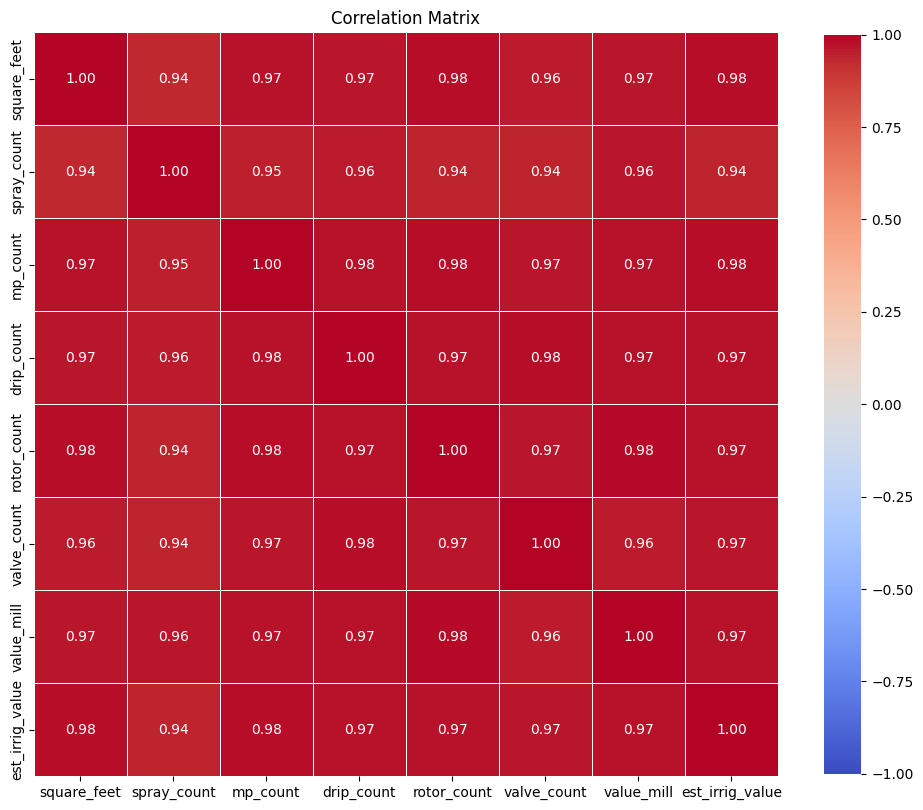

In [14]:
import seaborn as sns
# sector = df
correlation = num_df.corr()

plt.figure(figsize=(12, 12))

sns.heatmap(correlation,
            vmin=-1, vmax=1, center=0,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8}
            )

plt.title("Correlation Matrix")
plt.show()

In [15]:
avg_dom_sale_1 = (final_synthetic_df['est_irrig_value'].mean()).round(2)
print("The average estimated domestic market size per project is: $" + str(avg_dom_sale_1) + ".")
a1 = (avg_dom_sale_1*1308).round(2)
b1 = (avg_dom_sale_1*4017).round(2)
c1 = ((a1/b1)*100).round(4)
print("Hunter's Market Size: $" + str(a1) + ".")
print("Overall Market Size: $" + str(b1) + ".")
print("Percent:" + str(c1) + "%.")

The average estimated domestic market size per project is: $6173.03.
Hunter's Market Size: $8074322.96.
Overall Market Size: $24797060.65.
Percent:32.5616%.


In [16]:
print('''
The average estimated domestic market size per project is: $6165.03.
Hunter's Market Size: $8063859.24.
Overall Market Size: $24764925.51.
Percent:32.5616%.
      ''')


The average estimated domestic market size per project is: $6165.03.
Hunter's Market Size: $8063859.24.
Overall Market Size: $24764925.51.
Percent:32.5616%.
      


In [17]:
building_count_1 = final_synthetic_df.groupby('building_type').size().reset_index(name='count')
building_count_1.head()

,building_type,count
0,park,10
1,retail,1
2,school,989


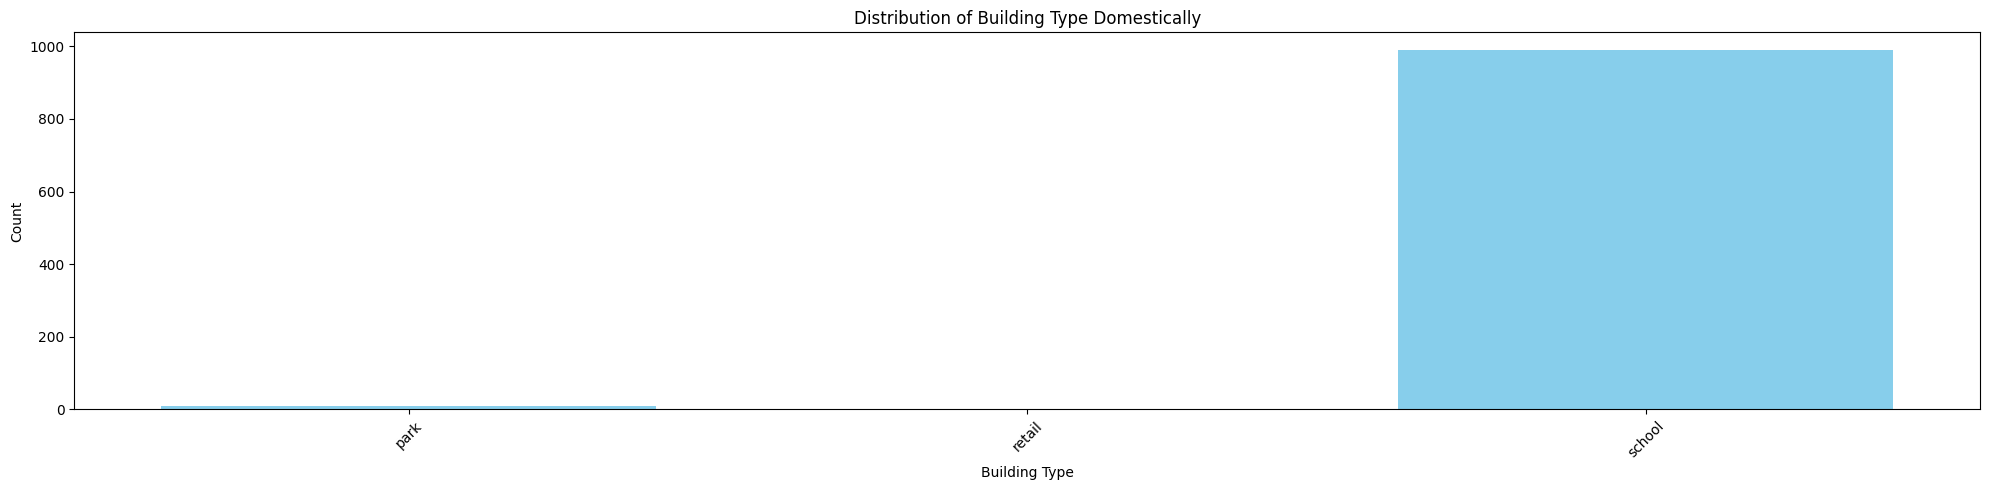

In [18]:
building_count_1 = final_synthetic_df.groupby('building_type').size().reset_index(name='count')
plt.figure(figsize=(20, 5)) 

plt.bar(building_count_1['building_type'], building_count_1['count'], color='skyblue')

plt.xlabel('Building Type')
plt.ylabel('Count')
plt.title('Distribution of Building Type Domestically')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [19]:
(final_synthetic_df['region'] == 'Florida').any()

True

In [20]:
valve_summ = final_synthetic_df.groupby('region').sum()
valve_summ = valve_summ.iloc[:,1:5]
valve_summ = valve_summ.reset_index()
valve_summ

,region,spray_count,mp_count,drip_count,rotor_count
0,Central States,501.179382,420.598969,189.196060,337.270508
1,Florida,64.306725,53.971451,24.251225,43.315338
2,Great Lakes,915.004333,768.259277,345.430267,616.384888
3,Northeast,1258.440796,1056.700806,475.156433,847.544373
4,Northern California,693.594421,582.484680,261.816437,467.139282
5,Northwest,35.839214,30.064846,13.519886,24.092621
6,Southeast,1788.137329,1501.369141,675.019409,1204.146240
7,Southern California,1644.956177,1381.128296,620.943054,1107.816772
8,Southwest,250.336929,210.144135,94.519104,168.596497


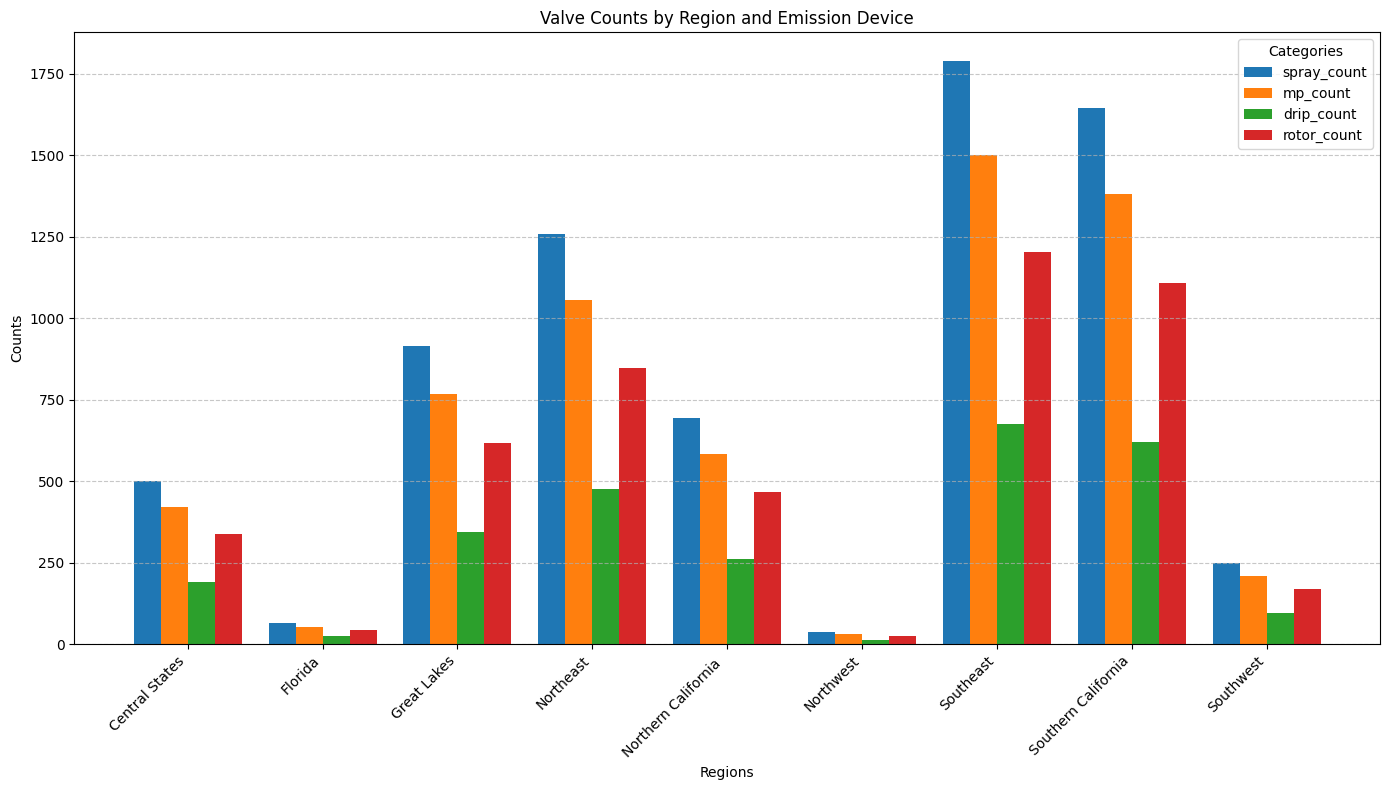

In [21]:
fig, ax = plt.subplots(figsize=(14, 8))

num_regions = len(valve_summ['region'])
num_categories = len(valve_summ.columns) - 1 

bar_width = 0.8 / num_categories
index = np.arange(num_regions)  

for i, category in enumerate(valve_summ.columns[1:]):
    offset = (i - num_categories / 2 + 0.5) * bar_width
    ax.bar(index + offset, valve_summ[category], bar_width, label=category)

ax.set_xlabel('Regions')
ax.set_ylabel('Counts')
ax.set_title('Valve Counts by Region and Emission Device')
ax.set_xticks(index)
ax.set_xticklabels(valve_summ['region'], rotation=45, ha='right')

ax.legend(title='Categories')

ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

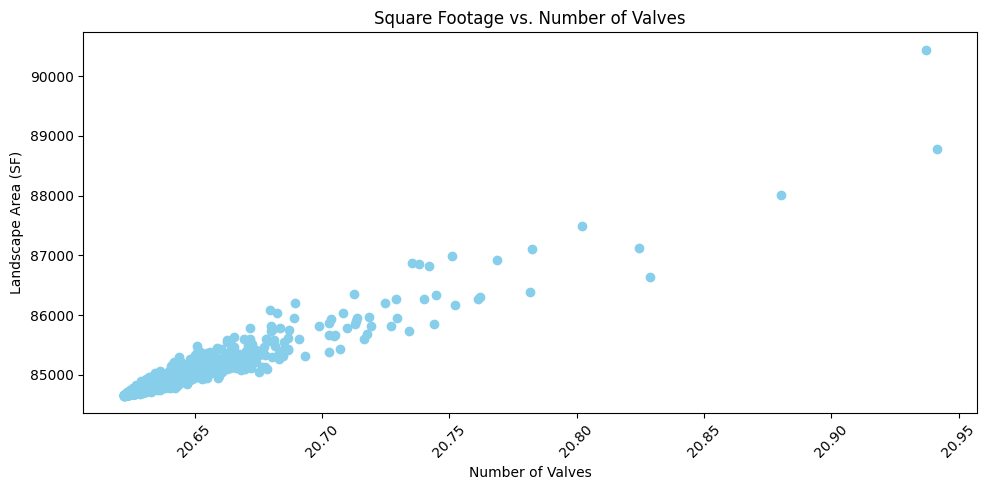

In [22]:
plt.figure(figsize=(10, 5)) 

plt.scatter(final_synthetic_df['valve_count'], final_synthetic_df['square_feet'], color='skyblue')

plt.xlabel('Number of Valves')
plt.ylabel('Landscape Area (SF)')
plt.title('Square Footage vs. Number of Valves')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

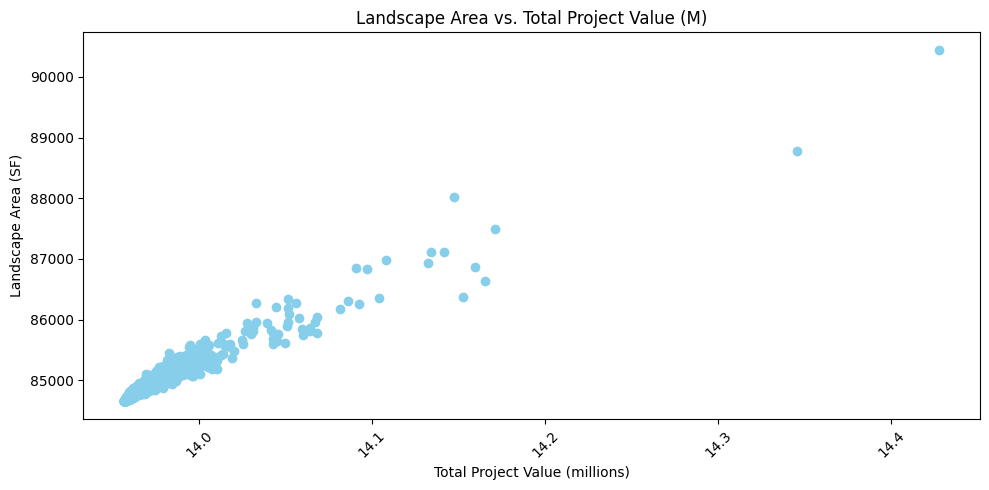

In [23]:
plt.figure(figsize=(10, 5)) 

plt.scatter(final_synthetic_df['value_mill'], final_synthetic_df['square_feet'], color='skyblue')

plt.xlabel('Total Project Value (millions)')
plt.ylabel('Landscape Area (SF)')
plt.title('Landscape Area vs. Total Project Value (M)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [37]:
dataset['est_irrig_value'].max()

47710.2

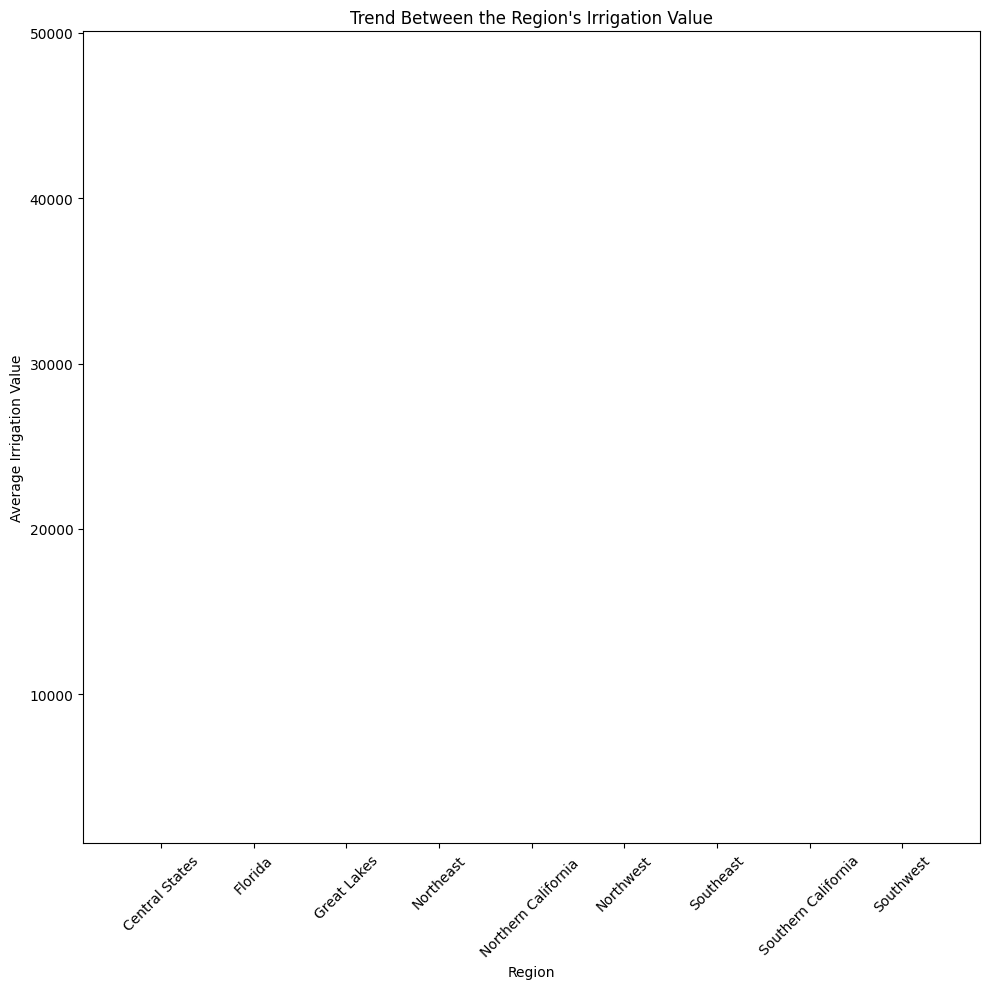

In [40]:
money_region = final_synthetic_df.groupby('region')['est_irrig_value'].mean()
money_region = money_region.reset_index()

plt.figure(figsize=(10, 10)) 

plt.bar(money_region['region'], money_region['est_irrig_value'], color='skyblue')
plt.ylim(1000, 50100)  # Set y-axis to start at 1000

plt.xlabel('Region')
plt.ylabel('Average Irrigation Value')
plt.title('Trend Between the Region\'s Irrigation Value')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [25]:
#hypothesis

scaler = MinMaxScaler()
# numerical_cols = final_synthetic_df.select_dtypes(include=['number']).columns

# Fit and transform the data
# df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
final_synthetic_df[numeric_features] = scaler.fit_transform(final_synthetic_df[numeric_features])


In [26]:
import statsmodels.api as sm

# Define predictor variables and dependent variable
X = final_synthetic_df[['square_feet', 'valve_count', 'value_mill']]
y = final_synthetic_df['est_irrig_value']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        est_irrig_value   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.187e+04
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:58:38   Log-Likelihood:                 2925.8
No. Observations:                1000   AIC:                            -5844.
Df Residuals:                     996   BIC:                            -5824.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0018      0.001      3.321      